<a href="https://colab.research.google.com/github/laura-turnbull-lloyd/STDH_teaching/blob/main/STDH2324__Week_8_practical_2_with_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practical 2: Earthquake frequency-magnitude distributions, probabilities and recurrence intervals

## Introduction
This week you will put ino practice what you have learned so far to undertake this self-led practical. You will explore the frequency-magnitude distributions of earthquakes in southern California, and the likelihood of a magnitude 6.7 and magnitude 8 earthquake occurring over the next 30 years.

##Aims
1. To acquire data from an earthquake catalogue
2. To evaluate whether the  earthquake data are suitable for time-independent analyses
3. To assess the frequency-magnitude relationship and undertake time-independent probability calculation

##Format of the practical
There are a set of tasks that you need to complete below. You also need to write a summary of your findings in a short scientific abstract of no more than 200 words. The abstract should provide a thorough summary of the work undertaken, assumptions of the work undertaken and should be well-written and organised.

You will answer the questions and write your abstract in this notebook.

##Submitting the practical
You will submit this work in two forms:
1. You are required to save this notebook as a pdf which you will upload to Turnitin.
2. You are also required to submit this workbook as a notebook. To do this, please click on the 'share' button (top right corner of this screen). Under 'General Access' change the access from 'Restricted' to 'Anyone with link'. Then copy the link and paste it here:

***Paste your link here:***

(note that to add text into a text block, you need to hover your mouse over the text block you want to edit, and double-click)

Please also rename your workbook (Week_8_practical_2.ipynb) so that it contains your name (e.g. Week_8_practical_2_LauraTurnbullLloyd.ipynb).




## Getting started
First, you need to load modules.

In [2]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy import stats


##Downloading data
Download data from the USGS using the following parameters:
* format = 'csv'
* starttime = 1994-01-01
* endtime = 2022-12-31
* minlatitude = 33.75
* maxlatitude = 34.75
* minlongitude = -119.20
* maxlongitude = -117.80
* minmagnitude = 1.0

Because there is a limit to how many records you can download in one go, first download data for 1994 to the end of 2007, and then 2008 to the end of 2022 (modifying the start and end times in the search parameters accordingly).

Once you have read in the datasets (be sure to read them into different dataframe names, e.g. eq1 and eq2) you can then merge them using for example:

frames = [eq1, eq2]

all_eq = pd.concat(frames)


In [3]:
# add required code here
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

payload = {'format': 'csv',
           'starttime': '1994-01-01',
           'endtime' : '2004-12-31',
           'minlatitude':'33.75',
           'maxlatitude':'34.75',
           'minlongitude':'-119.2',
           'maxlongitude':' -117.80',
           'minmagnitude' : '1',
           'limit':[1,20000]} # note that the max no of records you can get at a time is 20000

r = requests.get(url=url, params=payload)
from io import StringIO
eq1 = pd.read_csv(StringIO(r.text))
eq1.shape

payload = {'format': 'csv',
           'starttime': '2005-01-01',
           'endtime' : '2022-12-31',
           'minlatitude':'33.75',
           'maxlatitude':'34.75',
           'minlongitude':'-119.2',
           'maxlongitude':' -117.80',
           'minmagnitude' : '1',
           'limit':[1,20000]} # note that the max no of records you can get at a time is 20000

r = requests.get(url=url, params=payload)
from io import StringIO
eq2 = pd.read_csv(StringIO(r.text))
eq2.shape

(7863, 22)

In [5]:
# here, I'm adding code to merge the two dataframes
frames = [eq1, eq2]

all_eq = pd.concat(frames)

## Initial exploration of the data
As always, it is useful to plot the data to check it looks okay, and to check for any patterns. It is best to plot the earthquake time series with time on the x-axis and earthquake magnitude on the y-axis.

Therefore, to improve plotting of the data, it is useful to convert the time column in the earthquake dataset into a time format recognised by python. You can then plot out the data and have better formatted axes labels showing dates. It also enables you to perform calculations on the date/time information, which you will shortly undertake.


In [6]:
# to convert the time column into a proper time format:
all_eq.time = pd.to_datetime(all_eq.time)
all_eq.sort_values("time", inplace=True)


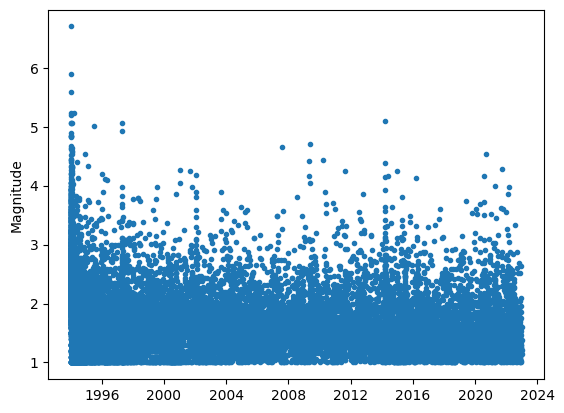

In [7]:
# to plot the data
fig = plt.figure()
plt.plot(all_eq.time, all_eq.mag, ".");
plt.ylabel("Magnitude");

##Are earthquakes clustered in space?
As we've discussed before, it's always useful to view the spatial characteristics of data.

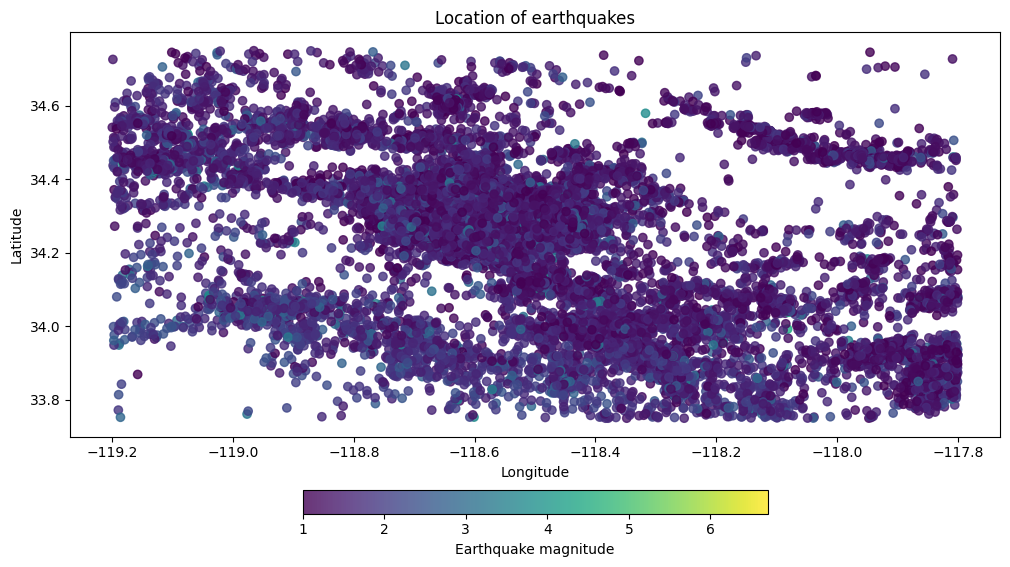

In [9]:
# to create a map of earthquake locations and their magnitudes (as you did in week 1)

fig, ax = plt.subplots(figsize=(12,7))
x = all_eq['longitude']
y = all_eq['latitude']
cbar = ax.scatter(x, y, c = all_eq.mag, alpha=0.8)
ax.set_title('Location of earthquakes')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.colorbar(cbar, cmap='viridris', ax=ax, label='Earthquake magnitude', orientation='horizontal', pad = 0.1, shrink = 0.5)
#ax.set_xlim(-160, -140)    # uncomment this and edit to zoom in
#ax.set_ylim(15, 25)        # uncomment this and edit to zoom in
plt.show()

## Question 1: Do the earthquakes appear to show any spatial clustering?

Clear clustering in earthquake distribution present, with some linearity to the clusters, which clearly relate to fault locations. Spatial clustering indicates that we need to be mindful that the area selected will impact the results of our subsequent probabiltiy analysis.

## Are earthquakes clustered in time?
The typical parameterization of earthquake periodicity or clustering is the Coefficient of Variation (CV), which is the standard deviation of the interval between earthquakes divided by the mean recurrence interval, and is a straightforward metric for evaluating earthquake spacing where:
* Periodic earthquake distributions have a CV < 1
* Poissonian earthquake distribution have a CV = 1
* Clustered earthquake distributions have a CV > 1


Now, you're in a position to calculate the earthquake CV using the code below:

In [10]:
# earthquake CV analysis
interarrival = all_eq.time.diff().dropna().apply(lambda x: x / np.timedelta64(1, "D")) # don't worry about the detail here. This code is basically calculating the time difference between earthquake dates and giving a result in days.

eq_standarddeviation = np.std(interarrival)
eq_mean = np.mean(interarrival)
eq_cv = eq_standarddeviation/eq_mean
print(eq_cv)


1.8906627833143628


## Question 2: What type of behaviour (clustered/Poissonian/periodic) is shown in the earthquake record? What are the implications of this type of behaviour for time-independent probobability analyses?

It is a clustered earthquake distribution. In a clustered distribution, events are not time-independent which violates the assumptions of time-independent hazard analysis.  

#Cumulative frequency-magnitude distribution
The next step is to inspect the frequency-magnitude distribution. Run the code below to plot out the frequency-magnitude distribution:

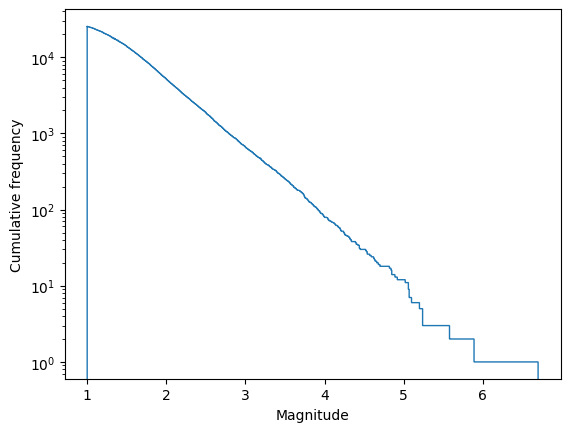

In [12]:
# show the cumulative frequency-magnitude distribution for the entire dataset
fig, ax = plt.subplots()
ax.hist(
    all_eq["mag"], bins=len(all_eq),
    histtype="step", log=True,
    cumulative=-1)
ax.set_xlabel("Magnitude")
ax.set_ylabel("Cumulative frequency")
plt.show()

##Question 3: Looking at the above plot, over what range do the data show an apparent powerlaw distribution? Why does this relation break down at the upper and lower extremes of the data?

Between magnitudes 1.4(ish) to 4.6(ish).

The relationship likely breaks down at the lower end because of the
difficulty in detecting very small (Mw < 2.0) earthquakes with a national seismometer network. In practice, this is often circumvented by deploying temporary, very dense regional or local networks to detect even small events with Mw < 1.0. The upper tail of the distribution where we see the more extreme events is very sensitive to the time slice of data used in the analysis, and whether or not there happened to be a large event in the inventory.

##Rate of earthquakes
You can use the earthquake inventory to determine the expected rate of earthquakes of a given magnitude or above per year.
To calculate the expected rate, you need to count the number of earthquakes of a given magnitude or above in the dataset, add a new column to the dataframe (called 'rate'), and calculate the rate by dividing the count of earthquakes equal to or above a specific size by the number of years in the dataset. This will return the rate of earthquakes per year of a given magnitude or above. The code below does this for you.


In [13]:
#earthquake rate calculation
from collections import Counter

counted_magnitudes = Counter(all_eq["mag"])
magnitudes = set(all_eq["mag"])
magnitudes = sorted(list(magnitudes), reverse=True)
frequency = np.zeros(len(magnitudes))
frequency[0] = counted_magnitudes[magnitudes[0]]
for i, magnitude in enumerate(magnitudes[1:]):
    frequency[i + 1] = frequency[i] + counted_magnitudes[magnitude]

Now you've got the overall frequency of earthquakes for each magnitude, you need to convert this to a rate per year:

In [14]:
#enter the calculation here to determine the rate, and save it in a variable called 'rate'
rate = frequency/29

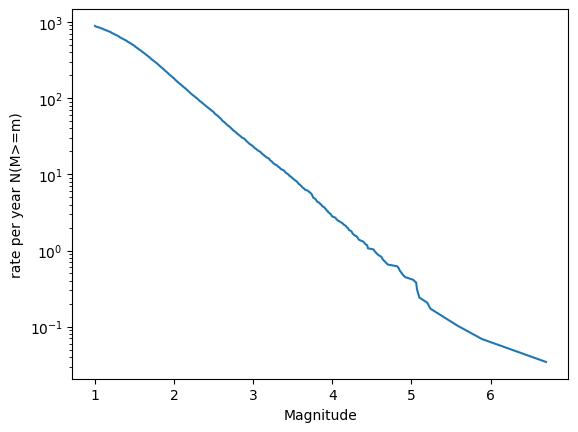

In [15]:
#plot the data
fig, ax = plt.subplots()
ax.semilogy(magnitudes, rate)
ax.set_ylabel("rate per year N(M>=m)")
ax.set_xlabel("Magnitude")
plt.show()

##Fitting a powerlaw distribution to the data
Recall that the relation between earthquake magnitude and frequency can be given by:

\begin{equation}
    \log_{10}{R} = a - bM
\end{equation}

where *M* is magnitude, *R* is the rate of events with magnitude >= *M*, and *a* and *b* are constants. Note that here we're referring to rate, rather than number.

What we are trying to do is find the best match between the predicted rate of earthquakes and the observed rate. Rearrange this equation to solve for R (rather than log(R), where R = rate)

You will need to optimise the fit of the powerlaw distribution by altering the range of earthquake magnitudes (xmin, xmax) over which you fit the powerlaw distribution.




In [16]:
# First, convert your magnitude and rate variables to a dataframe:
mag_rate = pd.DataFrame({'mag': magnitudes, 'rate': rate}, columns=['mag', 'rate'])

# Then, subsample the dataframe by adding values for xmin and xmax below, replacing '999' values

mag_rate_subsample = mag_rate[(mag_rate['mag']>1.4) & (mag_rate['mag']<4.6)]

# in the above line I substituted 999 with the xmin and xmax values identified before


Now fit the model to the subsampled data (i.e. the powerlaw fit between earthquake magnitude and rate of events) in an attempt to optimise the model fit, using the np.polyfit function (which you used in lecture 5). Remember that here you want to minimise the residual, whilst making use of as much of the earthquake inventory as possible...

In [17]:
# using the np.polyfit function to fit the model to the data
coefficients, residual, rank, singular_values, rcondition = np.polyfit(
        mag_rate_subsample.mag, np.log10(mag_rate_subsample.rate), deg=1, full=True)
b, a = coefficients
b = abs(b) # we want the absolute value of b when fitting the model
print(f"b={b:.2f}")
print(f"residual={residual}")
print(f"a={10**a:.2f}")

b=0.89
residual=[0.05501332]
a=10748.89


Now, use your optimised a and b parameter values to estimate the cumulative rate of events by rearranging

\begin{equation}
    \log_{10}{R} = a - bM
\end{equation}

to solve for R rather than log(R).

In [18]:
# enter your code here:

R = 10**(a-(b*mag_rate_subsample.mag))

Now visualize the model fit.

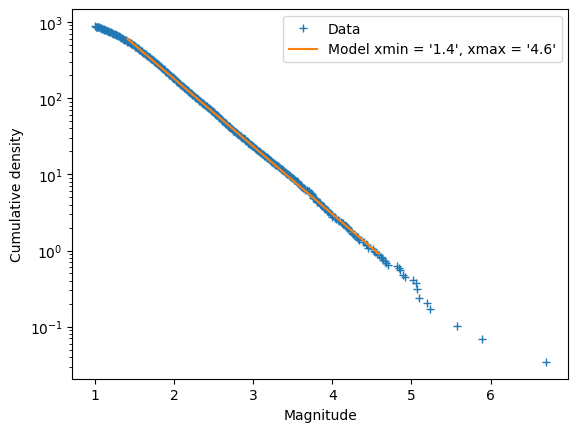

In [23]:
#plot your model (note that if you didn't assign the estimated cumulative rate of events to a variable called R, you'll need to rename R below)
fig, ax = plt.subplots()
ax.semilogy(
    magnitudes, rate, marker="+", linestyle="None",
    label="Data")
ax.semilogy(mag_rate_subsample.mag, R, label="Model xmin = '1.4', xmax = '4.6'")
#ax.semilogy(magnitudes, estimated_density, label="Model")
ax.set_ylabel("Cumulative density")
ax.set_xlabel("Magnitude")
ax.legend()
plt.show()

##Question 4. What is the best-fitting relationship that you find? Over what magnitude range does this best-fit relationship apply?
here you should detail the best fittin xmin and x max values, and you could detail the residials of the fit too.

## Probability and recurrence estimation
Your next task is to calculate the time-independent probability and recurrence intervals of an earthquake of at least M 6.7 and M 8 occurring in this region over the next 30 years. Use the code block below to enter your calculations and answer Questions 4 and 5 below.

You will have to use the optimum a and b parameter calues from your calculations above to estimate the probability and recurrence intervals of earthquakes this size, as they are larger than those contained within your earthquake.  





In [24]:
# Recurrence interval and probability calculations
# Enter your code here

Rate6_7 = 10 ** (a - (b*6.7)) # rate per year
T6_7 = 1/Rate6_7 # recurrence interval
p6_7 = 1/T6_7 #probability in 1 year
p6_7_30 = 1-(1-p6_7)**30 # probability over 30 years
print('Rate 6.7: ', Rate6_7)
print('Recurrence interval 6.7: ', T6_7)
print('Probability M 6.7 over 30 years: ', p6_7_30)

Rate8 = 10 ** (a - (b*8)) # rate per year
T8 = 1/Rate8 # recurrence interval
p8 = 1/T8 #probability in 1 year
p8_30 = 1-(1-p8)**30 # probability over 30 years
print('Rate 8.0: ', Rate8)
print('Recurrence interval 8.0: ', T8)
print('Probability M 8.0 over 30 years: ', p8_30)



Rate 6.7:  0.012024125588255889
Recurrence interval 6.7:  83.16613068119584
Probability M 6.7 over 30 years:  0.30435096390995664
Rate 8.0:  0.0008420185486357208
Recurrence interval 8.0:  1187.6222936184106
Probability M 8.0 over 30 years:  0.024954553583411365


##Question 5: What is the expected recurrence interval of an earthquake of at least M 6.6 and M 8?
Recurrence interval M 6.7 = 83 years

Recurence interval M 8 = 1188 years





##Question 6: What is the time-independent probability of an earthquake of at least M 6.7 and M 8 occurring in this region over the next 30 years? How do these values compare with the findings of WGCEP for southern California? (See https://pubs.usgs.gov/fs/2015/3009/pdf/fs2015-3009.pdf for summary)

Probability M 6.7 over next 30 years = 30%

Probability M 8.0 over next 30 years = 2.5%

Field and the 2014 WGCEP (2015) produced the following summary table of earthquake probabilities in southern California:


| Magnitude (>=) | Average repeat time (years) | 30-yr likelihood of one or more events (%) |
| --- | --- | --- |
| 5 |  0.24| 100|
| 6  |  2.3  | 100|
| 6.7 | 12 | 93    |
| 7| 25  | 75  |
| 7.5  | 87 | 36    |
| 8  | 522         | 7    |

Note that their definition of Southern California is not the same as our study area. Nevertheless,
their results are very close to ours. Our results are the same order of magnitude, and their
probabilities are within a factor of 2-3 of our estimates, despite the simplicity of our analysis and
the assumptions that we have made - the difference between the two approaches for a M8 isn't bad.

##Question 7: Briefly list the assumptions that we have made in estimating the probabilities and recurrence intervals in Questions 5 and 6.

We have made a number of assumptions in our estimates:
* Earthquakes in this region can be treated as a Poissonian process, leading to
timeindependent probabilities.
* Earthquakes across the entire study area can be described by a single
magnitude-frequency distribution; in other words, we have ignored the possibility that differences across the area in geology, fault type, fault spacing or density, and earthquake history have led to different distributions.
* The distribution has not changed over the 29 years represented by our data. In particular, we are assuming that the 1994 Mw 6.7 Northridge earthquake and its aftershocks can be described by the same distribution as the other earthquakes in our data set.
* We have also assumed that the distribution is essentially complete, at least between the magnitudes of xmin and xmax. In other words, we’ve assumed that there are no ‘missing’ events that might otherwise skew our estimates of the a- and b-values.

## Final task
Summarise your findings in a brief (no more than 200 words) abstract. This should be a summary that is thorough and covers all the material, assumptions, and that is well-written and well-organised

## Abstract

There are many ways of summarising the work, but this is what I would write (fillin in the x values with your results!). Be as precise and specific in your statements as you can; avoid vague sentences, and give specific results wherever possible. The first sentence or two should introduce the problem that is being addressed, and say what you have done to address it – don’t simply launch into your results, or the reader will not
know why you’ve done this work or why it’s important. Finally, I encourage you to use the active voice (‘I did...’, ‘I found...’) where possible – it is easier to follow and more engaging for your reader.

Time-independent earthquake probabilities depend in large part on observed rates of historical seismicity. Here I use 29 years of historical earthquake data from southern California, USA, to estimate the probability of large-magnitude earthquakes occurring in the next 30 years. Data from
the USGS Catalog indicate that there were x earthquakes within the study area between 1994 and 2022, with magnitudes up to 6.7. These events follow an approximate power-law distribution for magnitudes x to Mw x, and yield a best-fit a value of x and b-value of x, close to the global mean of b ~ 1.0. If we assume that southern California earthquakes are Poissonian, extrapolation to larger magnitudes indicates a probability of x% for a Mw ≥ 6.7 earthquake and a probability of x% for a Mw ≥ 8.0 earthquake over the next 30 years. The associated recurrence intervals are x yr for Mw ≥ 6.7 and x yr for Mw ≥ 8.0. These estimates assume a single, time-invariant magnitude-frequency distribution and do not account for geological limits on future earthquake magnitude, for example via fault length or maximum slip. With these assumptions, they yield a first-order estimate of future earthquake probabilities in the region.